1. Load the file data.csv, explore the data showing size and do some data exploration

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
df = pd.read_csv('data.csv', index_col=0)
df.head(5)

,F00,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,NaN,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,D,0.078747,1
1,NaN,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,C,-0.277881,1
2,NaN,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,B,1.070634,0
3,NaN,0.476623,0.494316,0.585131,0.434526,-0.670993,0.585131,1.527264,0.370484,0.585131,-0.549108,0.009128,0,B,0.524313,1
4,NaN,1.873207,-0.399677,-1.768674,0.600575,0.274092,-1.768674,-2.147604,0.623849,-1.768674,-0.387073,-0.470436,3,D,0.411954,2


In [41]:
print(f'size of df: {df.shape}\n')
print(f'brief desciption of df:\n {df.describe()}\n')
print(f'infos about df:\n{df.info()}\n')
df.isnull().sum()

size of df: (1000, 16)

brief desciption of df:
              F00          F01          F02          F03          F04  \
count  50.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    0.190899     0.464389     0.024135    -0.090224     0.597048   
std     1.664705     1.253621     0.981668     1.047949     1.525925   
min    -4.768419    -3.839055    -3.678544    -2.900095    -5.303289   
25%    -0.653835    -0.261353    -0.643978    -0.847538    -0.302429   
50%     0.528885     0.554465     0.041989    -0.186079     0.754161   
75%     1.433727     1.289121     0.683684     0.565310     1.647466   
max     2.741977     4.105899     3.140142     3.755152     4.404735   

               F05          F06          F07          F08          F09  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.019323    -0.090224    -0.018502     0.017389    -0.090224   
std       1.007243     1.047949     1.493104     0.995193     1.047949   
min   

,0
F00,950
F01,0
F02,0
F03,0
F04,0
F05,0
F06,0
F07,0
F08,0
F09,0


2. Deal with null values, imputing the mean for numeric features and the
string “unknown” for categorical features

In [23]:
#num_imputer = SimpleImputer(missing_values = np.nan, strategy='mean)

In [24]:
#cat_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='unknown')

non ha molto senso statisticamente fare la media su 5% dei valori

In [42]:
df = df.drop(columns=['F00'])
df.head(5)

,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,F13,F14,class
0,0.430770,-0.609499,0.153154,-0.244014,1.515603,0.153154,0.950208,-0.533577,0.153154,-1.188635,0.117022,0,D,0.078747,1
1,0.926832,-1.232067,-2.397645,-2.147707,-0.907709,-2.397645,-3.431166,-0.851632,-2.397645,-0.614415,-0.641244,0,C,-0.277881,1
2,1.488724,1.732096,-0.247872,2.564819,-0.744121,-0.247872,-0.298340,-0.276540,-0.247872,1.395205,-0.290211,6,B,1.070634,0
3,0.476623,0.494316,0.585131,0.434526,-0.670993,0.585131,1.527264,0.370484,0.585131,-0.549108,0.009128,0,B,0.524313,1
4,1.873207,-0.399677,-1.768674,0.600575,0.274092,-1.768674,-2.147604,0.623849,-1.768674,-0.387073,-0.470436,3,D,0.411954,2


In [43]:
df = pd.get_dummies(df, columns=['F13'], prefix=['F13'], drop_first=True)

3. train, optimize and test two classifier models of your choice, the
optimization must be done with cross validation, optimize the f1 score_macro

4. show the result for both models, including the optimal hyperparameter
values

In [37]:
x = df.drop(columns=['class'])
y = df['class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

param_gridDT = {
    'max_depth': [2,4,6],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

tree = DecisionTreeClassifier(random_state=42)

gridDT = GridSearchCV(tree, param_gridDT, cv=3, scoring='f1_macro').fit(xtrain, ytrain)
bestdt = gridDT.best_estimator_
print(f'best tree score: {gridDT.best_score_:.4f}')
print(f'best params for dt: {gridDT.best_params_}')


best tree score: 0.5926
best params for dt: {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}


In [36]:
param_gridRF = {
    'max_depth': [2,4,6],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[2,4,6]
}

forest = RandomForestClassifier(random_state=42)
gridRF = GridSearchCV(forest, param_gridRF, cv=3, scoring='f1_macro').fit(xtrain ,ytrain)
bestforest = gridRF.best_estimator_
print(f'best forest score:{gridRF.best_score_:.4f}')
print(f'best forest params:{gridRF.best_params_}')

best forest score:0.5693
best forest params:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2}


5. repeat the experiment using the best model found in the previous steps and doing feature selection

In [47]:
ypred = bestdt.predict(xtest)
print("Accuracy sul test:", accuracy_score(ytest, ypred))

Accuracy sul test: 0.81


6. show the results with the best hyperparameter values

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.75      0.80      0.78        76
           2       0.29      0.18      0.22        11

    accuracy                           0.81       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.80      0.81      0.80       200



<Axes: >

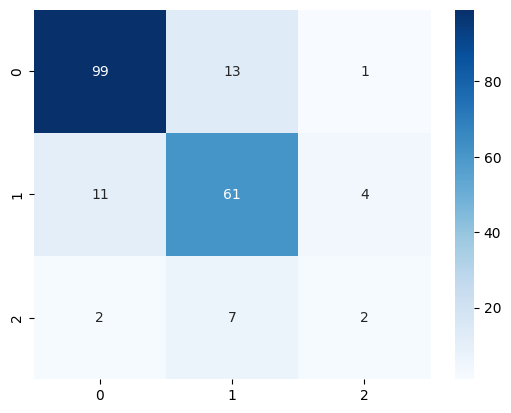

In [54]:
print("Classification Report:")
print(classification_report(ytest, ypred))

cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm,annot=True, cmap='Blues')

7. comment the results of the two experiments

1. Scelta del Modello (Confronto)

Sono stati testati due algoritmi di classificazione: un **Decision Tree** e una **Random Forest**.

Confrontando i risultati ottenuti dalla ricerca degli iperparametri (*Grid Search*), il Decision Tree ha ottenuto un punteggio migliore (**0.5926**) rispetto alla Random Forest (0.5693).
Di conseguenza, è stato selezionato l'Albero come modello finale ("*best estimator*") per l'analisi sul test set.

---

Analisi delle Performance sul Test Set

Applicando il modello migliore ai dati di test,è stato ottenuto un'**Accuracy globale dell'81%**.
Osservando la Matrice di Confusione, notiamo un comportamento diverso in base alla classe:

* **Classe 0:** È la classe che il modello predice meglio (Precision e Recall alte, **0.88**), con ben 99 casi corretti su 113.
* **Classe 1:** Il modello ottiene buoni risultati (**F1-score 0.78**), commettendo qualche errore di confusione con la classe 0.
* **Classe 2:** È il punto critico. Essendo poco presente nei dati (solo **11 esempi**), il modello fatica a riconoscerla, confondendola quasi sempre con la Classe 1.

---
Nonostante la Random Forest sia solitamente più potente, in questo caso specifico il **Decision Tree singolo si è rivelato più efficace**, probabilmente perché il dataset è di dimensioni ridotte o perché la complessità della Foresta non portava benefici aggiuntivi sui dati di validazione.